In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
import datetime as dt
import warnings

warnings.filterwarnings("ignore",category =RuntimeWarning)
pd.options.mode.chained_assignment = None  # default='warn'

# Importing the Data

In [21]:
def import_retention_data():
    '''
    A simple function that will read your current working directory and then see
    if there are files for train_iris.csv and test_iris.csv and then if they 
    exist will read them in as a pandas data frame
    
    note: if you want to read both files in you must set two variable names equal
    to the function to assign the data frames to names
    '''
    if os.path.exists("data/RetentionDataRaw.xlsx"):
        print("found the retention data")
        data_original = pd.read_excel("data/RetentionDataRaw.xlsx")
        data_original = data_original[:-5963]
        data_original.iloc[:,[5,7,8,9,23]] = data_original.iloc[:,[5,7,8,9,23]].astype(float)
        data_original['External Status'][data_original['External Status'] == " "] = "O"
        
    return data_original

In [22]:
#import the data
data = import_retention_data()

found the retention data


# Describtive Stats

In [6]:
#quick look summary statistics for continuous variables
data.describe()

,DebtDimId,Row Num,Months On Book,Days Deliq,Credit Limit,Opening Balance,Ending Balance,Over limit Amount,Actual Min Pay Due,Total Min Pay Due,Net Payments During Cycle,Net Purchases During Cycle,Net Cash Advances During Cycle,Net Premier Fees Billed During Cycle,Net Behavior Fees Billed During Cycle,Net Concessions Billed During Cycle,Quarterly Fico Score,Behavior Score,Good Customer Score
count,9.150200e+04,91502.000000,91502.000000,91502.000000,91502.000000,91502.000000,91502.000000,91502.000000,91502.000000,91502.000000,91502.000000,91502.000000,91502.000000,91502.000000,91502.000000,91502.000000,91502.000000,91502.000000,83808.000000
mean,1.654865e+07,5.295043,29.660969,17.774147,326.812255,264.368399,261.195524,19.500718,36.432615,52.703278,56.561057,40.309741,0.859373,14.326066,11.112883,0.852679,566.218356,612.338539,749.710696
std,4.699721e+06,2.857925,26.717078,38.094043,118.699857,150.921553,155.652459,45.903659,33.052748,69.071895,83.894443,78.803453,10.554838,18.604524,13.882308,9.019539,110.623161,114.277380,115.208235
min,2.258700e+04,1.000000,1.000000,0.000000,0.000000,-2077.750000,-2077.750000,0.000000,0.000000,0.000000,-1122.310000,-270.490000,0.000000,-234.700000,-119.450000,-612.510000,0.000000,13.000000,0.000000
25%,1.444266e+07,3.000000,11.000000,0.000000,250.000000,185.560000,180.070000,0.000000,20.000000,20.000000,0.000000,0.000000,0.000000,7.000000,2.160000,0.000000,521.000000,614.000000,690.000000
50%,1.826156e+07,5.000000,20.000000,0.000000,300.000000,263.045000,262.135000,0.000000,25.000000,25.000000,30.000000,0.000000,0.000000,8.940000,5.020000,0.000000,581.000000,648.000000,727.000000
75%,2.002233e+07,8.000000,40.000000,30.000000,350.000000,342.180000,343.740000,10.667500,40.000000,50.000000,63.000000,45.780000,0.000000,14.000000,14.140000,0.000000,632.000000,670.000000,797.000000
max,2.122586e+07,12.000000,170.000000,270.000000,2500.000000,3025.970000,3025.970000,2825.970000,720.760000,3025.970000,2833.600000,2416.200000,542.000000,203.000000,132.020000,334.270000,811.000000,724.000000,1000.000000


In [7]:
# finding the accounts that defaulted vs those that did not
id_terminated = data[data['External Status'] == 'Z']['DebtDimId'].tolist()
customers_terminated = data.DebtDimId.isin(id_terminated)
non_terminated_customers = np.logical_not(data.DebtDimId.isin(id_terminated))
data_term = data[customers_terminated]
data_not_term = data[non_terminated_customers]


In [8]:
mean_term_cont_vars = data_term.groupby(['DebtDimId']).mean()
mean_non_term_cont_vars = data_not_term.groupby(['DebtDimId']).mean()
data_ave_id = data.groupby(['DebtDimId']).mean()
term_fir = data_term.groupby(['DebtDimId']).first()
non_term_fir = data_not_term.groupby(['DebtDimId']).first()

#Take all of the defaulted accounts and group by their id and then make a data frame of 
#their months they started their account and frequency of how many started that month and year

first_obs_term = term_fir.groupby(['DebtDimId']).first()
term_data_month = first_obs_term['Open Date'].dt.to_period("M")
counts_term = term_data_month.value_counts(sort=False)
counts_term.sort_index(inplace=True)
dates_term = counts_term.index.to_timestamp()
dates1_term = pd.to_datetime(dates_term)
dates_df_term = pd.DataFrame({"counts": counts_term.tolist(),"date" : dates1_term})


#Take all of the non defaulted accounts and group by their id and then make a data frame of 
#their months they started their account and frequency of how many started that month and year

first_obs_non_def = non_term_fir.groupby(['DebtDimId']).first()
non_def_data_month = first_obs_non_def['Open Date'].dt.to_period("M")
counts_non_def = non_def_data_month.value_counts(sort=False)
counts_non_def.sort_index(inplace=True)
dates_non_def = counts_non_def.index.to_timestamp()
dates1_non_def = pd.to_datetime(dates_non_def)
dates_df_non_def = pd.DataFrame({"counts": counts_non_def.tolist(),"date" : dates1_non_def})

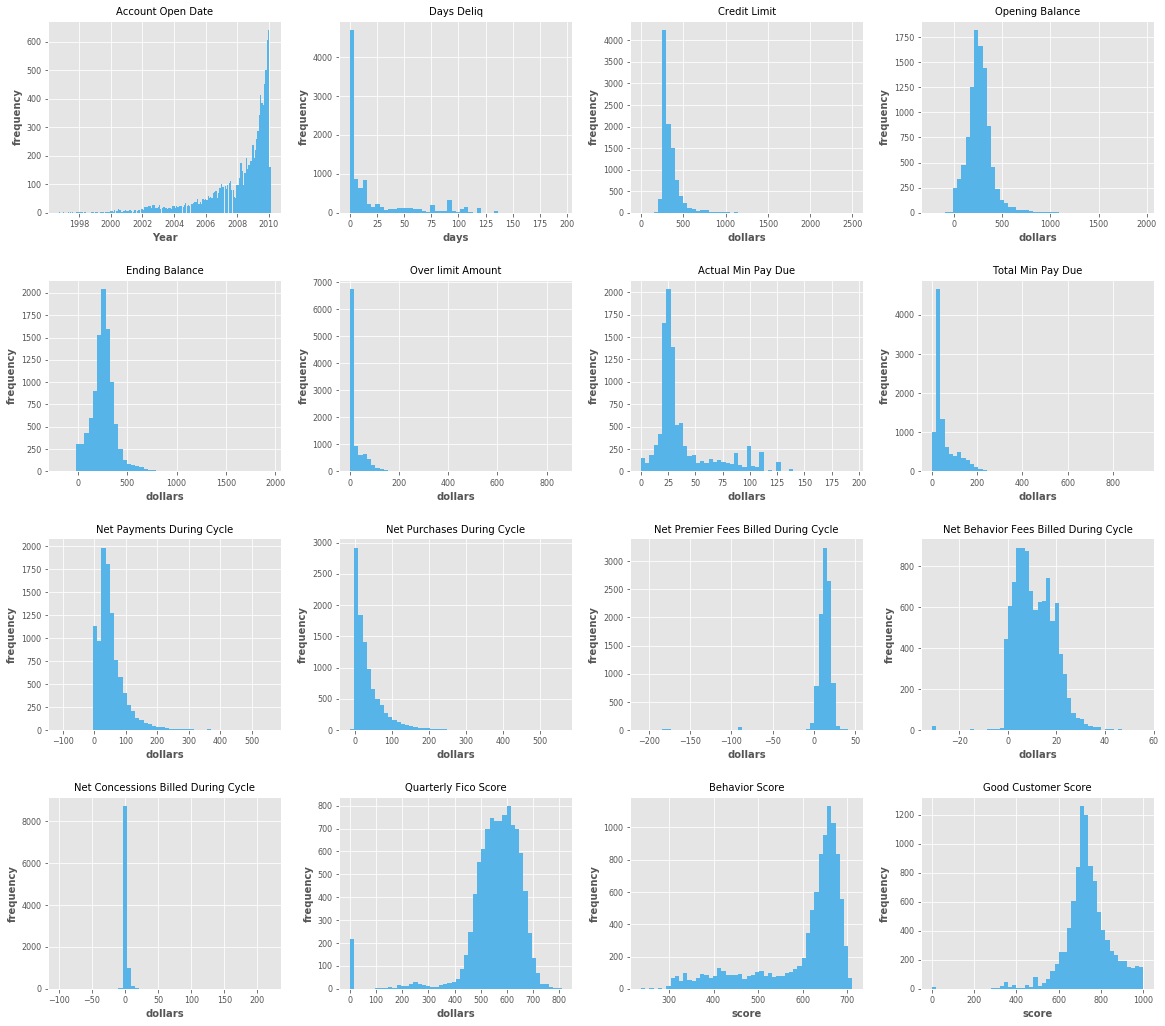

In [18]:
%matplotlib inline 
#this puts the plot output in the document

#set preselected parameters for plots
plt.style.use('ggplot')
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 20

# below is plotting the various distribution plots

first_obs = data.groupby(['DebtDimId']).first()
open_data_month = first_obs['Open Date'].dt.to_period("M")
counts = open_data_month.value_counts(sort=False)
counts.sort_index(inplace=True)
dates = counts.index.to_timestamp()
dates1 = pd.to_datetime(dates)
dates_df = pd.DataFrame({"counts": counts.tolist(),"date" : dates1})

width = np.diff(dates1).min()


xlabs = ['months', 'days', 'dollars', 'dollars', 'dollars', 'dollars', 'dollars', 'dollars', 'dollars', 'dollars', 'dollars', 'dollars',
        'dollars','dollars','score','score']

fig,ax = plt.subplots(4,4)
fig.set_size_inches(18.5, 10.5)
ax = ax.ravel()
fig.subplots_adjust(left=0.07, wspace=0.25, hspace=0.35, bottom=-.4)

i=1
for j in [2,3,4,5,6,7,8,9,10,12,13,14,15,16,17]:
    i += 1
    ax[0].bar(dates_df['date'], dates_df['counts'], width=width, color = "#56B4E9")
    ax[0].xaxis_date()
    ax[0].set_title("Account Open Date")
    ax[0].set_xlabel('Year')
    ax[0].set_ylabel('frequency')
    #fig.autofmt_xdate()
    ax[i-1].hist(data_ave_id.iloc[:,j],bins=50, color="#56B4E9")
    ax[i-1].set_title(mean_term_cont_vars.columns[j])
    ax[i-1].set_xlabel(xlabs[i-1])
    ax[i-1].set_ylabel('frequency')

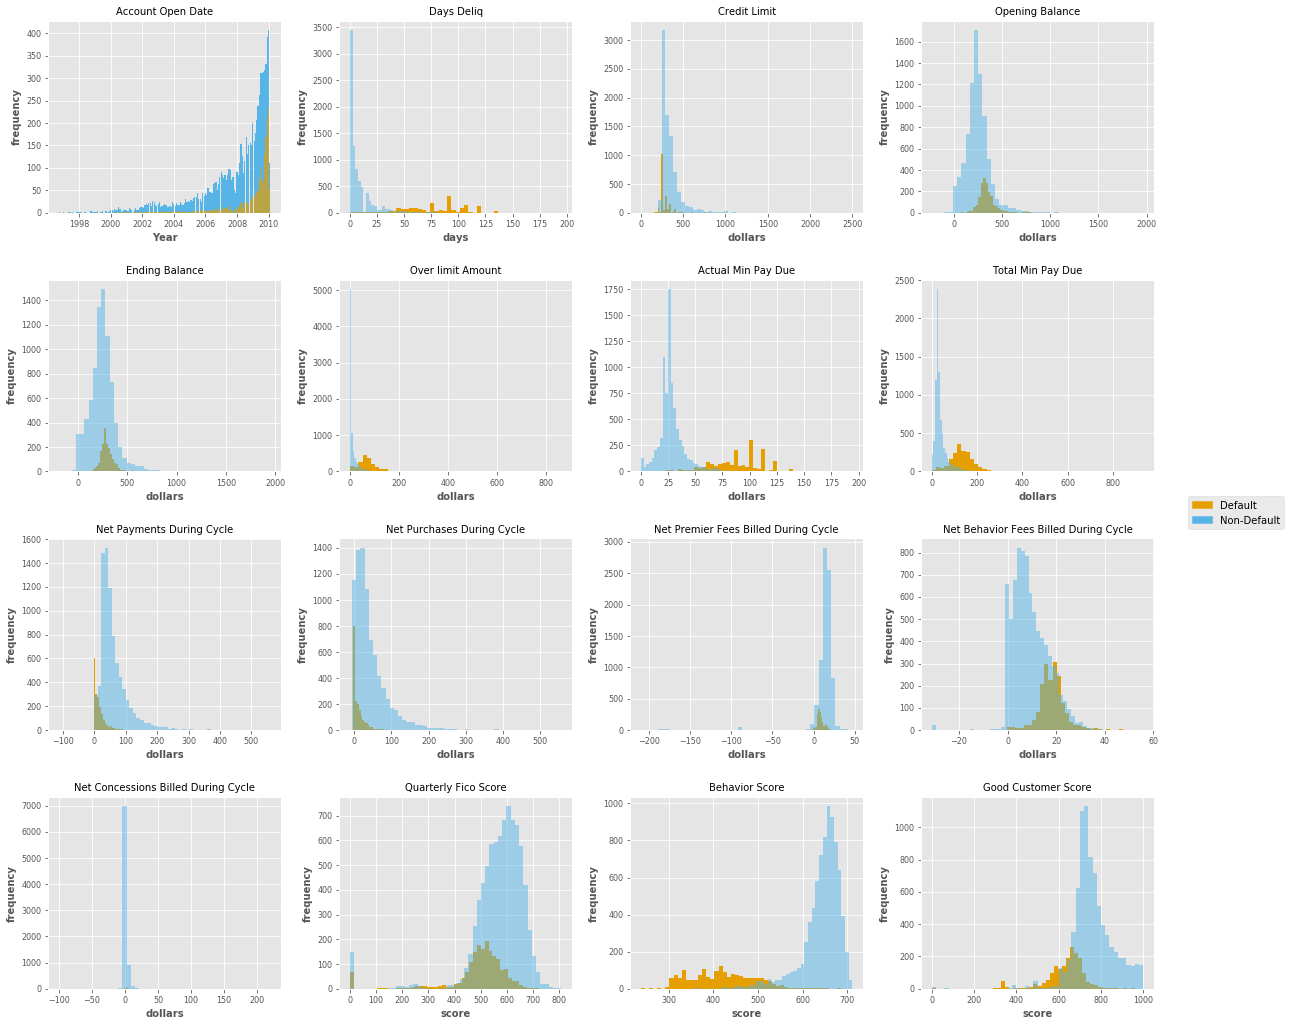

In [10]:
#below is plotting the tow groups for default vs non default


xlabs = ['days', 'dollars', 'dollars', 'dollars', 'dollars', 'dollars', 'dollars', 'dollars', 'dollars', 'dollars', 'dollars',
        'dollars','score','score','score']

fig,ax = plt.subplots(4,4)
fig.set_size_inches(18.5, 10.5)
ax = ax.ravel()
red_patch = mpatches.Patch(color="#E69F00", label='Default')
blue_patch = mpatches.Patch(color="#56B4E9", label='Non-Default')
fig.subplots_adjust(left=0.07, wspace=0.25, hspace=0.35, bottom=-.4)
fig.legend(handles = [red_patch,blue_patch],loc = 'right')

i=1
for j in [2,3,4,5,6,7,8,9,10,12,13,14,15,16,17]:
    i += 1
    ax[0].bar(dates_df_term['date'], dates_df_term['counts'], width=width, color = "#E69F00")
    ax[0].bar(dates_df_non_def['date'], dates_df_non_def['counts'], width=width, color = "#56B4E9", alpha=.3)
    ax[0].xaxis_date()
    ax[0].set_title("Account Open Date")
    ax[0].set_xlabel('Year')
    ax[0].set_ylabel('frequency')
    ax[i-1].hist(mean_term_cont_vars.iloc[:,j],bins=50, color="#E69F00")
    ax[i-1].hist(mean_non_term_cont_vars.iloc[:,j],alpha=.5,bins=50, color="#56B4E9")
    ax[i-1].set_title(mean_term_cont_vars.columns[j])
    ax[i-1].set_xlabel(xlabs[i-2])
    ax[i-1].set_ylabel('frequency')


In [23]:
#below is how to get a frequency table for all closure reasons for each individual that closed their accounts

id_closed = data[data['External Status'] == 'C']['DebtDimId'].index
closed_data = data.iloc[id_closed,:]
closed_data.drop_duplicates(subset='DebtDimId', inplace=True)

closed_reasons = closed_data['ClosureReason'].value_counts(dropna=False)
labels = closed_reasons.index.tolist()
y_pos = np.arange(len(labels))
for i in range(1, len(labels)):
    labels[i] = labels[i].rstrip()
    
closed_reasons.index = labels

Text(0.5, 1.0, 'Closure Reason')

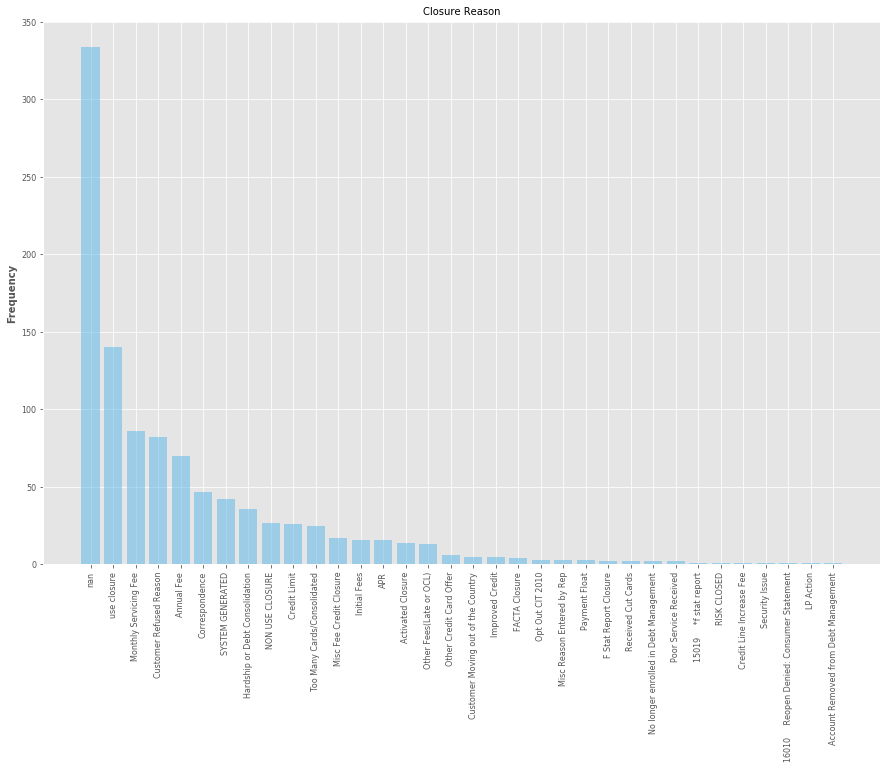

In [12]:
#plot the frequency table of closure reasons

plt.figure(figsize=(15,10))

plt.bar(y_pos, closed_reasons, align='center', alpha=0.5,color = "#56B4E9")
plt.xticks(y_pos, labels,rotation=90)
plt.ylabel('Frequency')
plt.title('Closure Reason')

Text(0.5, 1.0, 'Correlation Between all Continuous Variables')

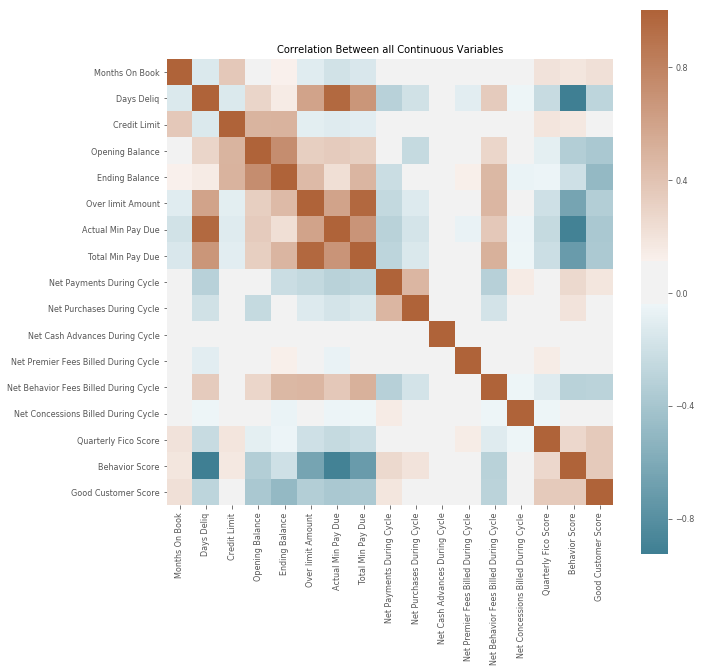

In [13]:
#create a correlation matrix of the continuous variables

f, ax = plt.subplots(figsize=(10, 10))
corr_data = data.iloc[:,3:]
corr = corr_data.corr()
corr_plot = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 30, sep=20, as_cmap=True),
            square=True, ax=ax)
corr_plot.set_title('Correlation Between all Continuous Variables') #add a title

In [14]:
#Create a data frame of only the charge off accounts

closure_df = data[data['External Status'] == 'Z']['DebtDimId'].index
Z_df = data.iloc[closure_df]

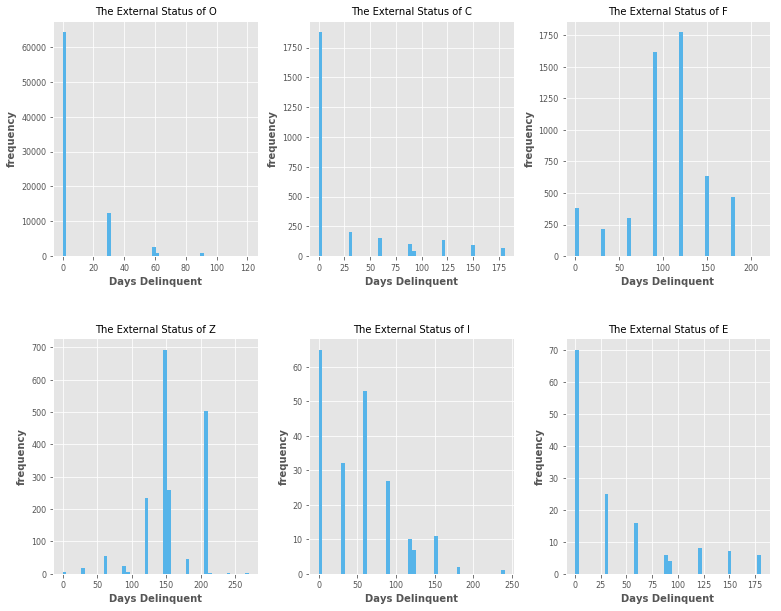

In [15]:
#plot the delenqencies days by status

unique_status = data['External Status'].unique()

fig,ax = plt.subplots(2,3)
fig.set_size_inches(12, 6)
ax = ax.ravel()
fig.subplots_adjust(left=0.07, wspace=0.25, hspace=0.35, bottom=-.4)

for i in range(len(unique_status)):
    df = data[data['External Status'] == unique_status[i]]['DebtDimId'].index
    dff = data.iloc[df]
    ax[i].hist(dff['Days Deliq'],bins=50, color="#56B4E9")
    ax[i].set_title(f"The External Status of {unique_status[i]}")
    ax[i].set_ylabel('frequency')
    ax[i].set_xlabel('Days Delinquent')


In [16]:
#find the individuals that go straight from open to close

weird_ind = []
id_nums = data['DebtDimId'].unique()
a = ['C', 'E', 'F', 'I']
for i in range(len(id_nums)):
    individual = data[data['DebtDimId'] == id_nums[i]]
    
    if "Z" in individual['External Status'].tolist():
        if not any(x in a for x in individual['External Status'].tolist()):
            weird_ind.append(individual[['DebtDimId']].iloc[0])

weird_default = data[data['DebtDimId'].isin(pd.DataFrame(weird_ind).iloc[:,0].tolist())]
weird_people = weird_default[weird_default['External Status'] == 'Z']

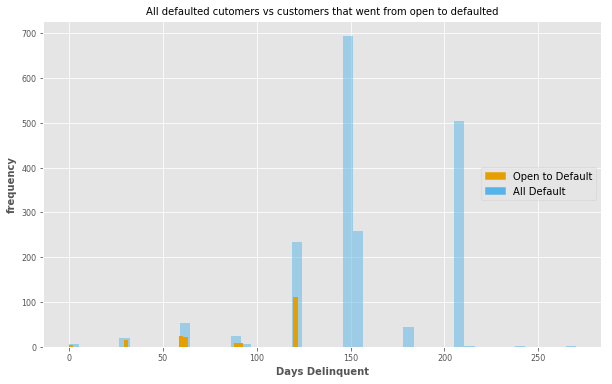

In [17]:
#plot the weird people vs all closed accounts

plt.figure(figsize=(10,6))
plt.hist(Z_df['Days Deliq'],alpha=.5,color="#56B4E9",bins=50)
plt.hist(weird_people['Days Deliq'],color="#E69F00",bins=50)
plt.xlabel('Days Delinquent')
plt.ylabel('frequency')
plt.title('All defaulted cutomers vs customers that went from open to defaulted')
red_patch = mpatches.Patch(color="#E69F00", label='Open to Default')
blue_patch = mpatches.Patch(color="#56B4E9", label='All Default')
plt.legend(handles = [red_patch,blue_patch],loc = 'right')
plt.show()